<a href="https://www.kaggle.com/code/iqmansingh/cifar10-image-classification-cnn?scriptVersionId=134256497" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries

In [35]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
from tensorflow.keras.datasets import cifar10
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [36]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [37]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [38]:
len(classes)

10

# Normalizing the Images

In [39]:
X_train = X_train/255.0
X_test = X_test/255.0

In [40]:
X_train.shape
# 50000 -> no of images
# 32 * 32 -> pixels of images
# 3 -> RGB (colors)

(50000, 32, 32, 3)

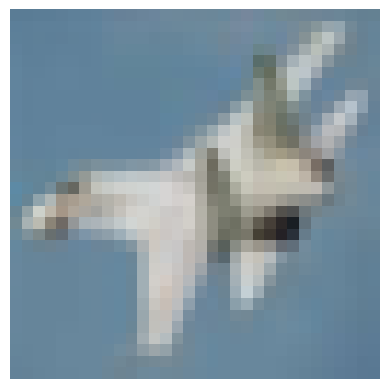

In [41]:
plt.imshow(X_test[10])
plt.axis("off");

# Builing a CNN

In [42]:
model = tf.keras.models.Sequential()

## Layer 1 (Conv2D)
 - filter = 32
 - kernel_size = 3
 - padding = 'same'
 - activation = 'relu'
 - input_shape = (32,32,3)


In [43]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=[32,32,3]))

## Layer 2 (Conv2D)
 - filters = 32 
 - kernel_size = 3
 - padding = same
 - activation = relu

In [44]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same'))

## Layer 3 (MaxPool)
 - pool_size = 2
 - strides = 2
 - padding = visit

In [45]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

## Layer 4 (Conv2D)
 - filters = 64
 - kernel_size = 3
 - padding = same
 - activation = relu  

In [46]:
model.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = 3,padding = 'same',activation = 'relu'))

## Layer 5 (Conv2D)
 - filters = 64
 - kernel_size = 3
 - padding = same
 - activation = relu  

In [47]:
model.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = 3,padding = 'same',activation = 'relu'))

## Layer 6 (MaxPool)
 - pool_size = 2
 - strides = 2
 - padding = visit

In [48]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

## Layer 7 (Flattening)

In [49]:
model.add(tf.keras.layers.Flatten())

## Layer 8 (Fully-Connected)

In [50]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

## Layer 9 (Dropout)

In [51]:
model.add(tf.keras.layers.Dropout(0.3))

## Layer 10 (Fully-Connected)

In [52]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

## Layer 12 (Output)
 - units = no of classes

In [53]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

## Compiling Model 

In [55]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_crossentropy','accuracy'])

# Training the CNN

In [56]:
earlyStopping = tf.keras.callbacks.EarlyStopping(patience=3,start_from_epoch=5)

In [57]:
history = model.fit(X_train,y_train,epochs=25,batch_size=100,validation_split=0.2,callbacks=[earlyStopping])

Epoch 1/25
400/400 [==============================] - 6s 8ms/step - loss: 1.6865 - sparse_categorical_crossentropy: 1.6865 - accuracy: 0.3798 - val_loss: 1.3557 - val_sparse_categorical_crossentropy: 1.3557 - val_accuracy: 0.5064
Epoch 2/25
400/400 [==============================] - 2s 6ms/step - loss: 1.2396 - sparse_categorical_crossentropy: 1.2396 - accuracy: 0.5547 - val_loss: 1.0444 - val_sparse_categorical_crossentropy: 1.0444 - val_accuracy: 0.6315
Epoch 3/25
400/400 [==============================] - 2s 6ms/step - loss: 1.0341 - sparse_categorical_crossentropy: 1.0341 - accuracy: 0.6317 - val_loss: 0.9126 - val_sparse_categorical_crossentropy: 0.9126 - val_accuracy: 0.6770
Epoch 4/25
400/400 [==============================] - 2s 6ms/step - loss: 0.9055 - sparse_categorical_crossentropy: 0.9055 - accuracy: 0.6791 - val_loss: 0.8432 - val_sparse_categorical_crossentropy: 0.8432 - val_accuracy: 0.7073
Epoch 5/25
400/400 [==============================] - 2s 6ms/step - loss: 0.8071

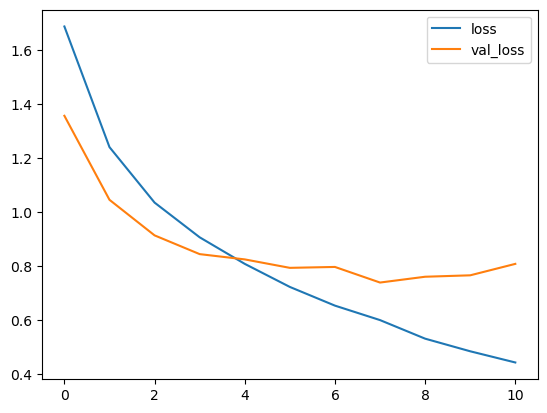

In [58]:
df = pd.DataFrame(history.history)
df.loc[:, ['loss', 'val_loss']].plot();

# Evaluating the CNN

In [59]:
evals = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8132 - sparse_categorical_crossentropy: 0.8132 - accuracy: 0.7408


In [60]:
print(evals)

[0.8131807446479797, 0.8131807446479797, 0.7408000230789185]
